In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the dataset
file_path = './CO2 Emissions_Canada.csv'  
data = pd.read_csv(file_path)

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_cylinders = np.random.choice(data['Cylinders'], 100)
sample_fuel_L_100km = np.random.choice(data['Fuel Consumption Comb (L/100 km)'], 100)
sample_fuel_mpg = np.random.choice(data['Fuel Consumption Comb (mpg)'], 100)

# Calculate means and standard deviations
mean_cylinders = np.mean(sample_cylinders)
std_cylinders = np.std(sample_cylinders, ddof=1)
mean_fuel_L_100km = np.mean(sample_fuel_L_100km)
std_fuel_L_100km = np.std(sample_fuel_L_100km, ddof=1)
mean_fuel_mpg = np.mean(sample_fuel_mpg)
std_fuel_mpg = np.std(sample_fuel_mpg, ddof=1)

# Hypothesis testing for Cylinders vs Fuel Consumption Comb (L/100 km)
t_statistic_cylinders_fuel_L, p_value_cylinders_fuel_L = stats.ttest_ind(sample_cylinders, sample_fuel_L_100km)
# Confidence Interval for Cylinders
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical_cylinders = stats.t.ppf(1 - alpha/2, df=len(sample_cylinders)-1)
margin_of_error_cylinders = t_critical_cylinders * (std_cylinders / np.sqrt(len(sample_cylinders)))
confidence_interval_cylinders = (mean_cylinders - margin_of_error_cylinders, mean_cylinders + margin_of_error_cylinders)

# Confidence Interval for Fuel Consumption Comb (L/100 km)
t_critical_fuel_L = stats.t.ppf(1 - alpha/2, df=len(sample_fuel_L_100km)-1)
margin_of_error_fuel_L = t_critical_fuel_L * (std_fuel_L_100km / np.sqrt(len(sample_fuel_L_100km)))
confidence_interval_fuel_L = (mean_fuel_L_100km - margin_of_error_fuel_L, mean_fuel_L_100km + margin_of_error_fuel_L)

# Hypothesis testing for Cylinders vs Fuel Consumption Comb (mpg)
t_statistic_cylinders_fuel_mpg, p_value_cylinders_fuel_mpg = stats.ttest_ind(sample_cylinders, sample_fuel_mpg)
# Confidence Interval for Fuel Consumption Comb (mpg)
t_critical_fuel_mpg = stats.t.ppf(1 - alpha/2, df=len(sample_fuel_mpg)-1)
margin_of_error_fuel_mpg = t_critical_fuel_mpg * (std_fuel_mpg / np.sqrt(len(sample_fuel_mpg)))
confidence_interval_fuel_mpg = (mean_fuel_mpg - margin_of_error_fuel_mpg, mean_fuel_mpg + margin_of_error_fuel_mpg)

# Print the results
print("Mean and SD for Cylinders:", mean_cylinders, std_cylinders)
print("Mean and SD for Fuel Consumption Comb (L/100 km):", mean_fuel_L_100km, std_fuel_L_100km)
print("Mean and SD for Fuel Consumption Comb (mpg):", mean_fuel_mpg, std_fuel_mpg)
print("T-test result for Cylinders vs Fuel Consumption Comb (L/100 km):", t_statistic_cylinders_fuel_L, p_value_cylinders_fuel_L)
print("Confidence Interval for Cylinders:", confidence_interval_cylinders)
print("Confidence Interval for Fuel Consumption Comb (L/100 km):", confidence_interval_fuel_L)
print("T-test result for Cylinders vs Fuel Consumption Comb (mpg):", t_statistic_cylinders_fuel_mpg, p_value_cylinders_fuel_mpg)
print("Confidence Interval for Fuel Consumption Comb (mpg):", confidence_interval_fuel_mpg)


Mean and SD for Cylinders: 5.3 1.5142421513513922
Mean and SD for Fuel Consumption Comb (L/100 km): 10.933000000000002 3.1087707467028762
Mean and SD for Fuel Consumption Comb (mpg): 27.39 7.3976449979132894
T-test result for Cylinders vs Fuel Consumption Comb (L/100 km): -16.290021129165677 2.0699862992808472e-38
Confidence Interval for Cylinders: (4.999541505459959, 5.600458494540041)
Confidence Interval for Fuel Consumption Comb (L/100 km): (10.316152438603787, 11.549847561396216)
T-test result for Cylinders vs Fuel Consumption Comb (mpg): -29.254280301879437 8.203820164869529e-74
Confidence Interval for Fuel Consumption Comb (mpg): (25.922146739389703, 28.857853260610298)


In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_cylinders = np.random.choice(data['Cylinders'], 100)
sample_fuel_L_100km = np.random.choice(data['Fuel Consumption Comb (L/100 km)'], 100)
sample_fuel_mpg = np.random.choice(data['Fuel Consumption Comb (mpg)'], 100)

# Correlation between Cylinders and Fuel Consumption Comb (L/100 km)
correlation_cylinders_fuel_L, p_value_cylinders_fuel_L = stats.pearsonr(sample_cylinders, sample_fuel_L_100km)
# Correlation between Cylinders and Fuel Consumption Comb (mpg)
correlation_cylinders_fuel_mpg, p_value_cylinders_fuel_mpg = stats.pearsonr(sample_cylinders, sample_fuel_mpg)

# Calculate the confidence intervals for the correlation coefficients
def correlation_ci(correlation, sample_size, confidence_level=0.95):
    z = np.arctanh(correlation)
    se = 1 / np.sqrt(sample_size - 3)
    z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_interval = z + np.array([-1, 1]) * z_critical * se
    return np.tanh(z_interval)

ci_cylinders_fuel_L = correlation_ci(correlation_cylinders_fuel_L, len(sample_cylinders))
ci_cylinders_fuel_mpg = correlation_ci(correlation_cylinders_fuel_mpg, len(sample_cylinders))

# Print the results
print("Correlation and p-value for Cylinders vs Fuel Consumption Comb (L/100 km):", correlation_cylinders_fuel_L, p_value_cylinders_fuel_L)
print("Confidence Interval for correlation between Cylinders and Fuel Consumption Comb (L/100 km):", ci_cylinders_fuel_L)
print("Correlation and p-value for Cylinders vs Fuel Consumption Comb (mpg):", correlation_cylinders_fuel_mpg, p_value_cylinders_fuel_mpg)
print("Confidence Interval for correlation between Cylinders and Fuel Consumption Comb (mpg):", ci_cylinders_fuel_mpg)


Correlation and p-value for Cylinders vs Fuel Consumption Comb (L/100 km): -0.08731090048540231 0.38770710100239175
Confidence Interval for correlation between Cylinders and Fuel Consumption Comb (L/100 km): [-0.27894526  0.11101099]
Correlation and p-value for Cylinders vs Fuel Consumption Comb (mpg): 0.06970364379979806 0.4907529182511655
Confidence Interval for correlation between Cylinders and Fuel Consumption Comb (mpg): [-0.12847341  0.26252748]


In [3]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


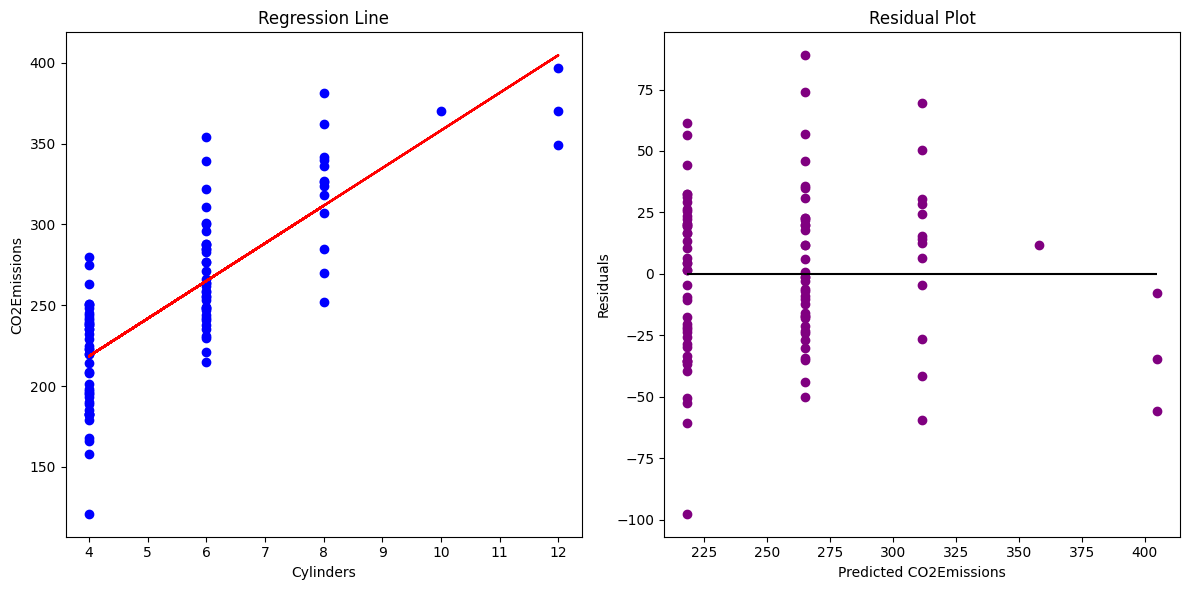

Linear Regression Equation: CO2 Emissions(g/km) = 125.5035 + 23.2610(Cylinders)
R-squared: 0.6321


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
data = df
# Randomly select 100 samples for Cylinders and CO2 Emissions(g/km)
np.random.seed(0)
sample_indices = np.random.choice(df.index, size=100, replace=False)
sample_cylinders = df['Cylinders'].loc[sample_indices]
target_variable = df['CO2Emissions'].loc[sample_indices]

# Create the linear regression model
model = LinearRegression()
model.fit(sample_cylinders.values.reshape(-1, 1), target_variable)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Predictions
predictions = model.predict(sample_cylinders.values.reshape(-1, 1))

# R-squared
r2 = r2_score(target_variable, predictions)

# Plotting
plt.figure(figsize=(12, 6))

# Regression Line Plot
plt.subplot(1, 2, 1)
plt.scatter(sample_cylinders, target_variable, color='blue')
plt.plot(sample_cylinders, predictions, color='red')
plt.title('Regression Line')
plt.xlabel('Cylinders')
plt.ylabel('CO2Emissions')

# Residual Plot
plt.subplot(1, 2, 2)
residuals = target_variable - predictions
plt.scatter(predictions, residuals, color='purple')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='black')
plt.title('Residual Plot')
plt.xlabel('Predicted CO2Emissions')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print the regression equation and R-squared value
print(f"Linear Regression Equation: CO2 Emissions(g/km) = {intercept:.4f} + {slope:.4f}(Cylinders)")
print(f"R-squared: {r2:.4f}")
